In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('IoT_Sensor.csv', encoding = 'unicode_escape')

In [7]:
df.shape

(4352, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4352 entries, 0 to 4351
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   timestamp                 4352 non-null   object 
 1   machine_id                4352 non-null   int64  
 2   temperature               4352 non-null   float64
 3   vibration                 4352 non-null   float64
 4   humidity                  4352 non-null   float64
 5   pressure                  4352 non-null   float64
 6   energy_consumption        4352 non-null   float64
 7   machine_status            4352 non-null   int64  
 8   anomaly_flag              4352 non-null   int64  
 9   predicted_remaining_life  4352 non-null   int64  
 10  failure_type              4352 non-null   object 
 11  downtime_risk             4352 non-null   float64
 12  maintenance_required      4352 non-null   int64  
dtypes: float64(6), int64(5), object(2)
memory usage: 442.1+ KB


In [9]:
# Select the numerical columns that will be used as features for the Isolation Forest model
features = df[['temperature', 'vibration', 'humidity', 'pressure', 'energy_consumption', 'downtime_risk']]

In [10]:
features.head(10)

,temperature,vibration,humidity,pressure,energy_consumption,downtime_risk
0,78.61,28.65,79.96,3.73,2.16,0.0
1,68.19,57.28,35.94,3.64,0.69,0.0
2,98.94,50.20,72.06,1.00,2.49,1.0
3,90.91,37.65,30.34,3.15,4.96,1.0
4,72.32,40.69,56.71,2.68,0.63,0.0
5,70.88,38.38,51.01,3.19,3.24,0.0
6,73.05,40.70,61.59,2.35,1.63,0.0
7,90.00,56.52,48.32,3.30,3.30,0.0
8,96.04,24.98,50.47,1.59,3.08,1.0
9,55.33,49.29,33.85,2.14,3.74,0.0


In [11]:
# Train the model
from sklearn.ensemble import IsolationForest
model = IsolationForest(contamination='auto', random_state=42)
model.fit(features)

IsolationForest(random_state=42)

In [12]:
# Predict anomalies
predictions = model.predict(features)
anomaly_scores = model.decision_function(features)

In [13]:
# Add the predictions and scores as new columns to the original DataFrame
df['anomaly_prediction'] = predictions
df['anomaly_score'] = anomaly_scores

In [14]:
df

,timestamp,machine_id,temperature,vibration,humidity,pressure,energy_consumption,machine_status,anomaly_flag,predicted_remaining_life,failure_type,downtime_risk,maintenance_required,anomaly_prediction,anomaly_score
0,1/1/2025 0:00,39,78.61,28.65,79.96,3.73,2.16,1,0,106,Normal,0.0,0,1,0.008424
1,1/1/2025 0:01,29,68.19,57.28,35.94,3.64,0.69,1,0,320,Normal,0.0,0,1,0.019025
2,1/1/2025 0:02,15,98.94,50.20,72.06,1.00,2.49,1,1,19,Normal,1.0,1,-1,-0.119318
3,1/1/2025 0:03,43,90.91,37.65,30.34,3.15,4.96,1,1,10,Normal,1.0,1,-1,-0.111033
4,1/1/2025 0:04,8,72.32,40.69,56.71,2.68,0.63,2,0,65,Vibration Issue,0.0,1,1,0.043156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4347,1/4/2025 0:27,12,78.88,45.48,40.85,4.02,3.26,1,0,95,Normal,0.0,0,1,0.069605
4348,1/4/2025 0:28,11,68.01,47.91,48.26,2.97,4.84,1,0,357,Normal,0.0,0,1,0.043396
4349,1/4/2025 0:29,37,93.59,45.73,32.16,4.84,2.98,1,1,15,Normal,1.0,1,-1,-0.101305
4350,1/4/2025 0:30,25,86.54,53.47,44.77,2.97,4.01,1,0,401,Normal,0.0,0,1,0.069926


In [15]:
# Analyze the results
anomalies = df[df['anomaly_prediction'] == -1]

# Sort the anomalies by their anomaly score in ascending order.
anomalies_sorted = anomalies.sort_values(by='anomaly_score')

/tmp/ipython-input-2204956560.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


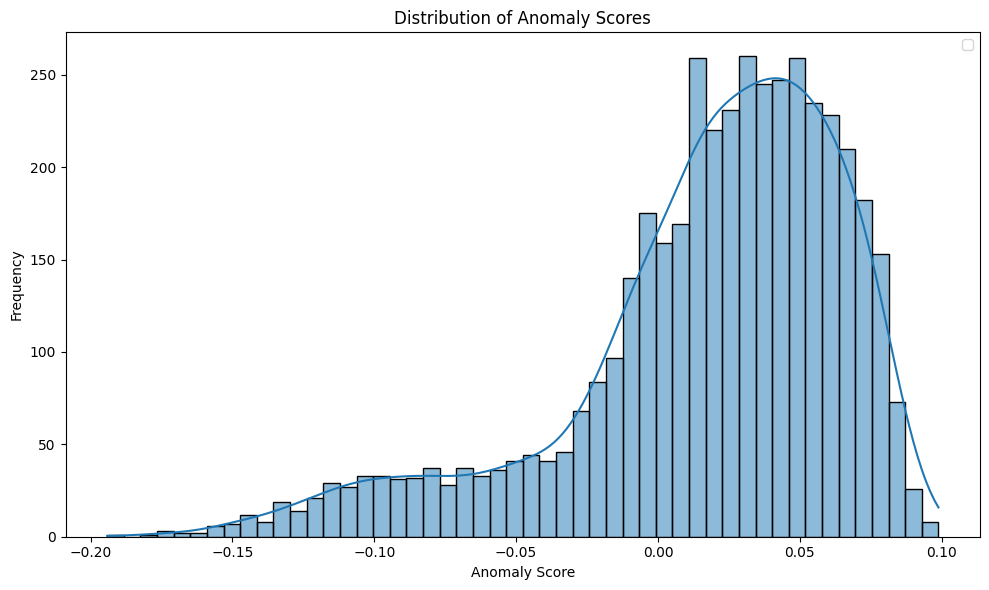

In [16]:
# Distribution of Anomaly Scores
plt.figure(figsize=(10, 6))
sns.histplot(df['anomaly_score'], bins=50, kde=True)
plt.title('Distribution of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()